<a href="https://colab.research.google.com/github/thalankiabhishek/DocImg/blob/main/DocOCR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!sudo apt install tesseract-ocr -qq
!pip install pytesseract Pillow bbox -qq

The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 21 not upgraded.
Need to get 4,795 kB of archives.
After this operation, 15.8 MB of additional disk space will be used.
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 3.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package tesseract-ocr-eng.
(Reading database ... 144611 files and directories currently installed.)
Preparing to unpack .../tesseract-ocr-eng_4.00~git24-0e00fe6-1.

In [2]:
#@title Libraries
import pandas as pd
import numpy as np
import os, cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pytesseract, bbox
from tqdm.notebook import tqdm
from google.colab.patches import cv2_imshow

In [3]:
!wget https://miro.medium.com/max/1400/1*W3bDw8mNI-GI-F_mro3XMg.png -O sample.png -qq

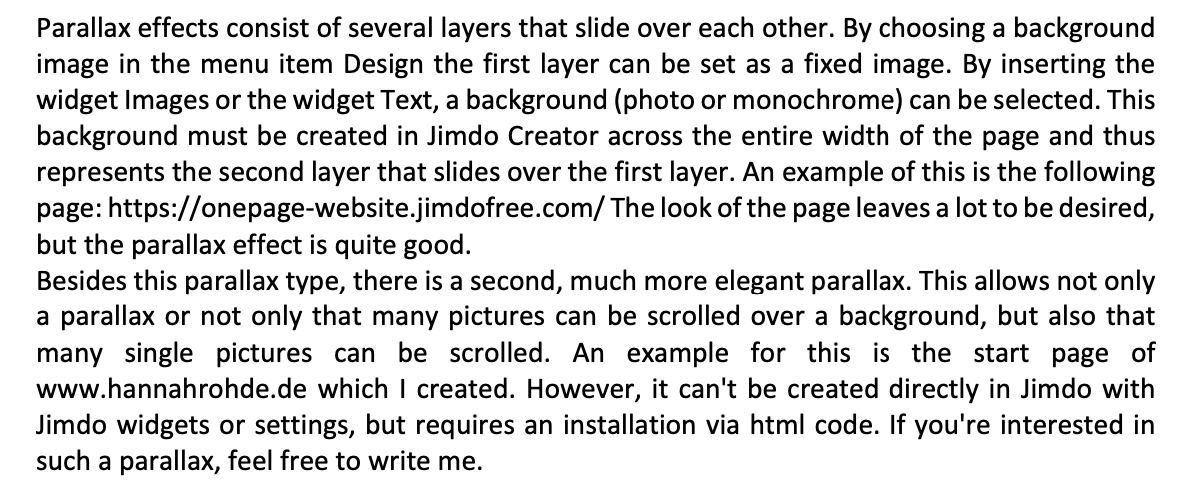

Parallax effects consist of several layers that slide over each other. By choosing a background
image in the menu item Design the first layer can be set as a fixed image. By inserting the
widget Images or the widget Text, a background (photo or monochrome) can be selected. This
background must be created in Jimdo Creator across the entire width of the page and thus
represents the second layer that slides over the first layer. An example of this is the following
page: https://onepage-website.jimdofree.com/ The look of the page leaves a lot to be desired,
but the parallax effect is quite good.

Besides this parallax type, there is a second, much more elegant parallax. This allows not only
a parallax or not only that many pictures can be scrolled over a background, but also that
many single pictures can be scrolled. An example for this is the start page of
www.hannahrohde.de which | created. However, it can't be created directly in Jimdo with
Jimdo widgets or settings, but requires an ins

In [4]:
#@title Extracting Text from an image-document using Google's Tesseract
image = cv2.imread('sample.png')
img_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
cv2_imshow(img_rgb)
print(pytesseract.image_to_string(img_rgb))

In [5]:
!wget https://1.bp.blogspot.com/-DGXx-yHTTFQ/V1XedHDbQJI/AAAAAAAABUE/4RJDjUyJ1xMDsF8HYNigy-GKsYKm9cb_gCLcB/s1600/Schreiner%2Bcolumn.png -O news_article.png -qq

## Pre-processing Image to search texteual content in a document-image

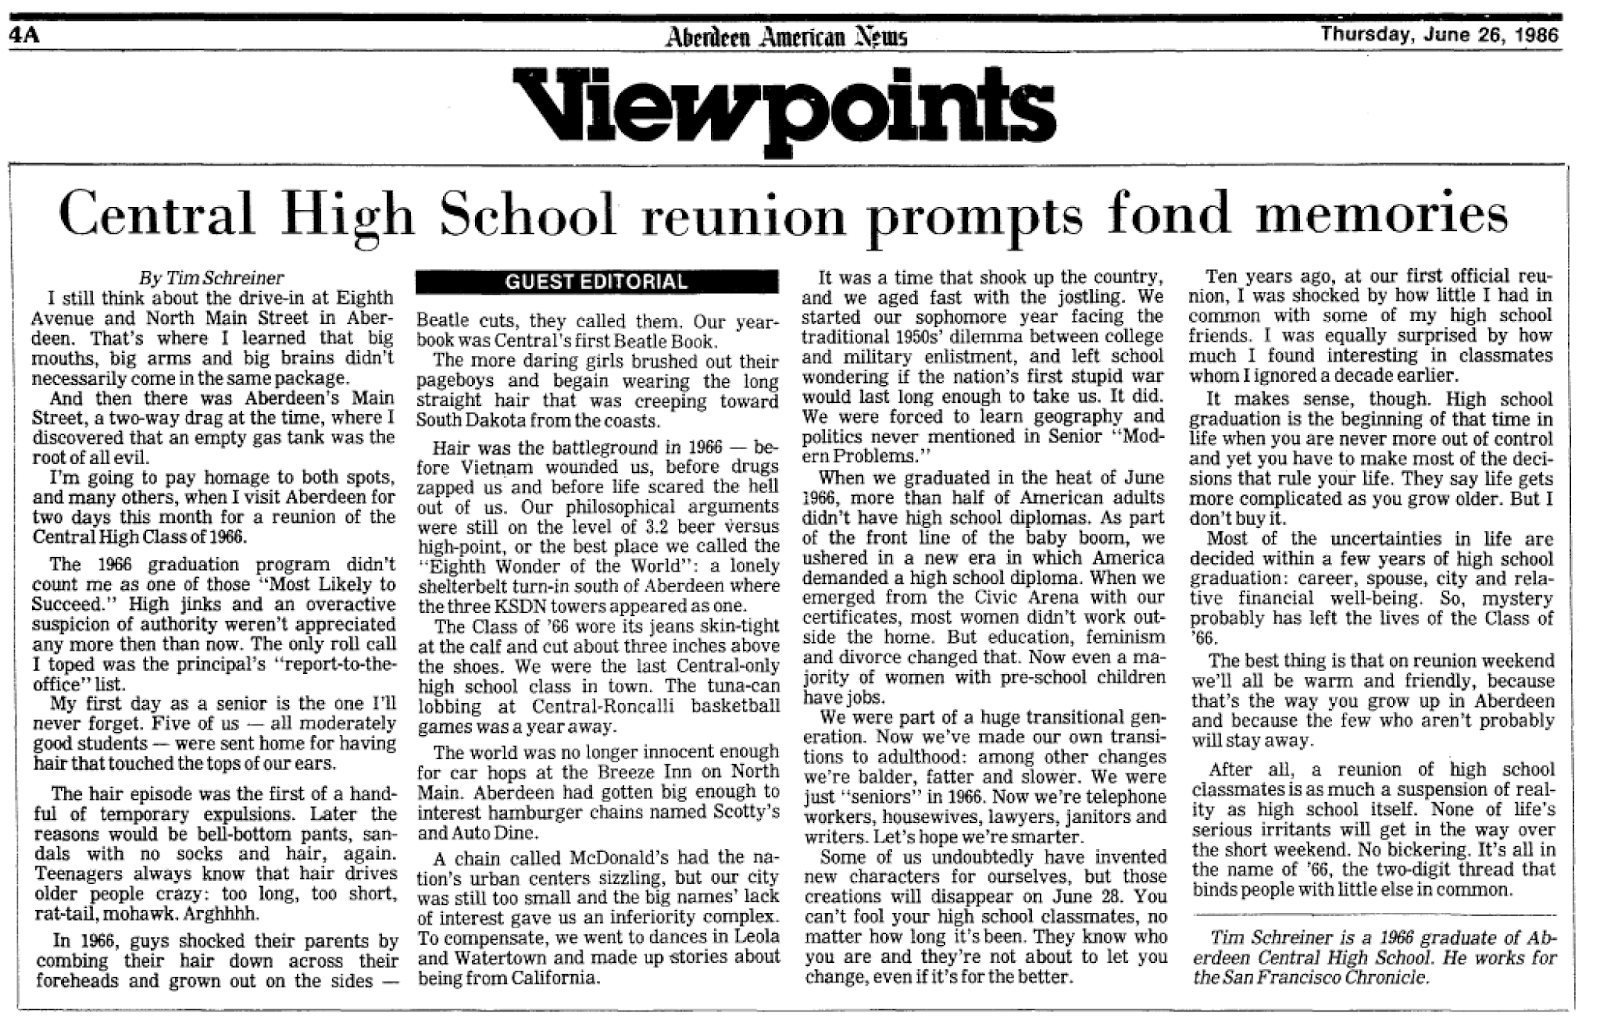

In [6]:
news = cv2.imread('news_article.png')
news = cv2.cvtColor(news, cv2.COLOR_BGR2GRAY)
cv2_imshow(news)

### Binarize GrayScaled Images to clean the document-image

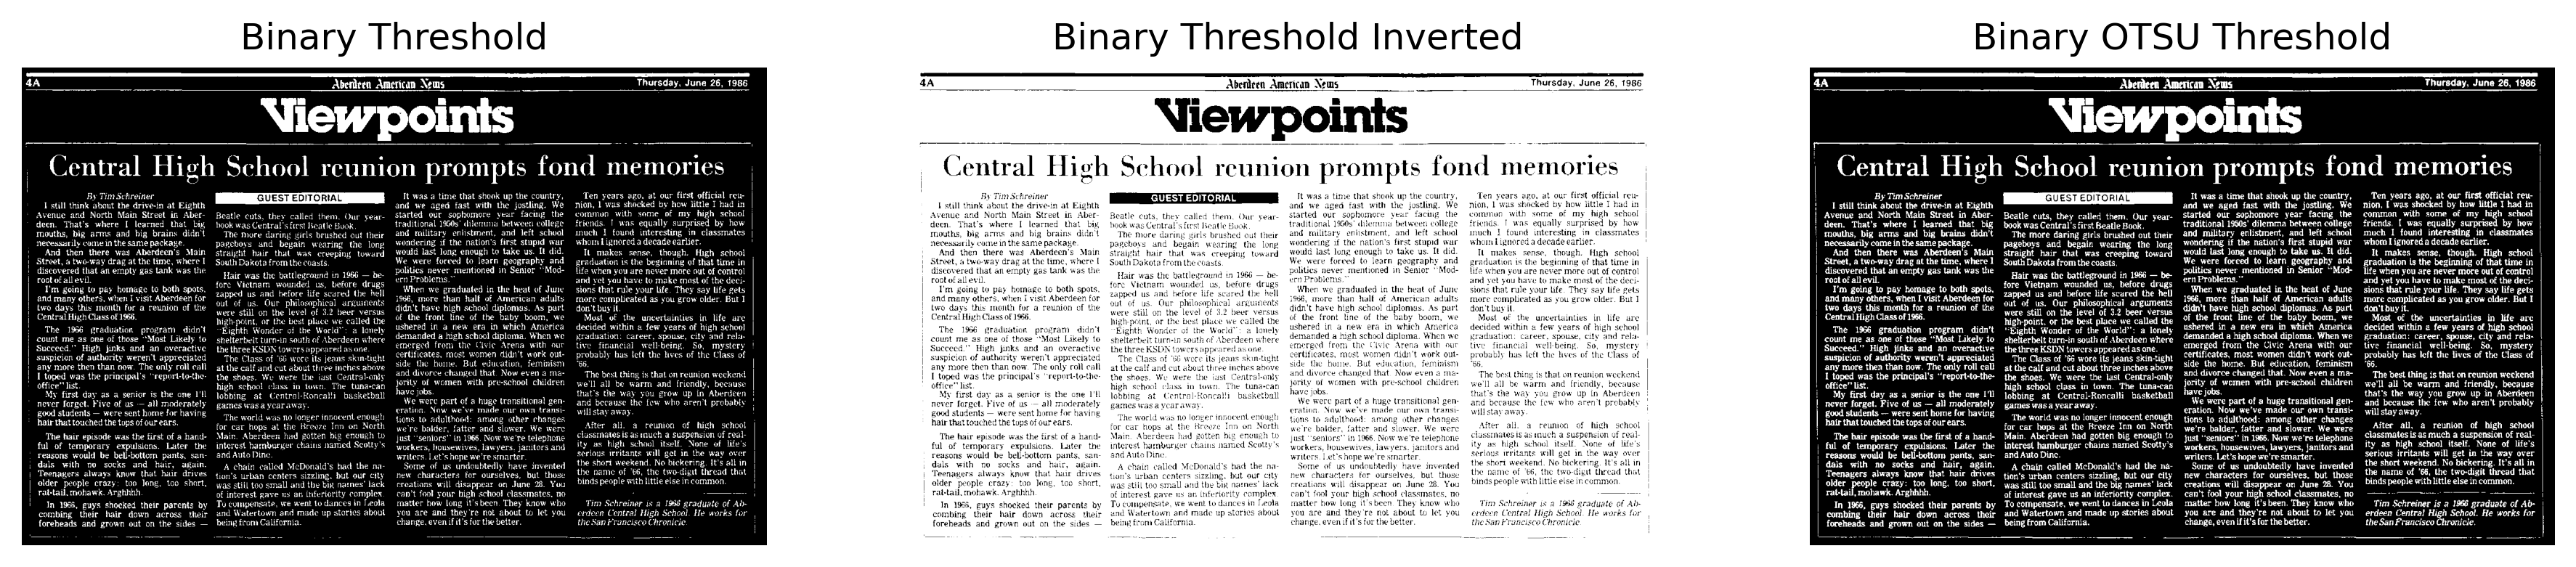

In [7]:
_, thresh1 = cv2.threshold(news, 120, 255, cv2.THRESH_BINARY) 
_, thresh2 = cv2.threshold(news, 120, 255, cv2.THRESH_BINARY_INV) 
_, thresh3 = cv2.threshold(news, 0, 255, cv2.THRESH_OTSU | cv2.THRESH_BINARY)
 
f, a = plt.subplots(nrows=1, ncols=3, dpi=300, figsize=(15, 10))
thresholds = [thresh1, thresh2, thresh3]
labels = ['Binary Threshold', 'Binary Threshold Inverted', 'Binary OTSU Threshold']
for ax, img, labels in zip(a.flatten(), thresholds, labels):
  ax.imshow(img, cmap='Greys')
  ax.set_title(labels)
  ax.set_axis_off()

### Dilating Text so as to search for words, sentences, paragraphs, etc.

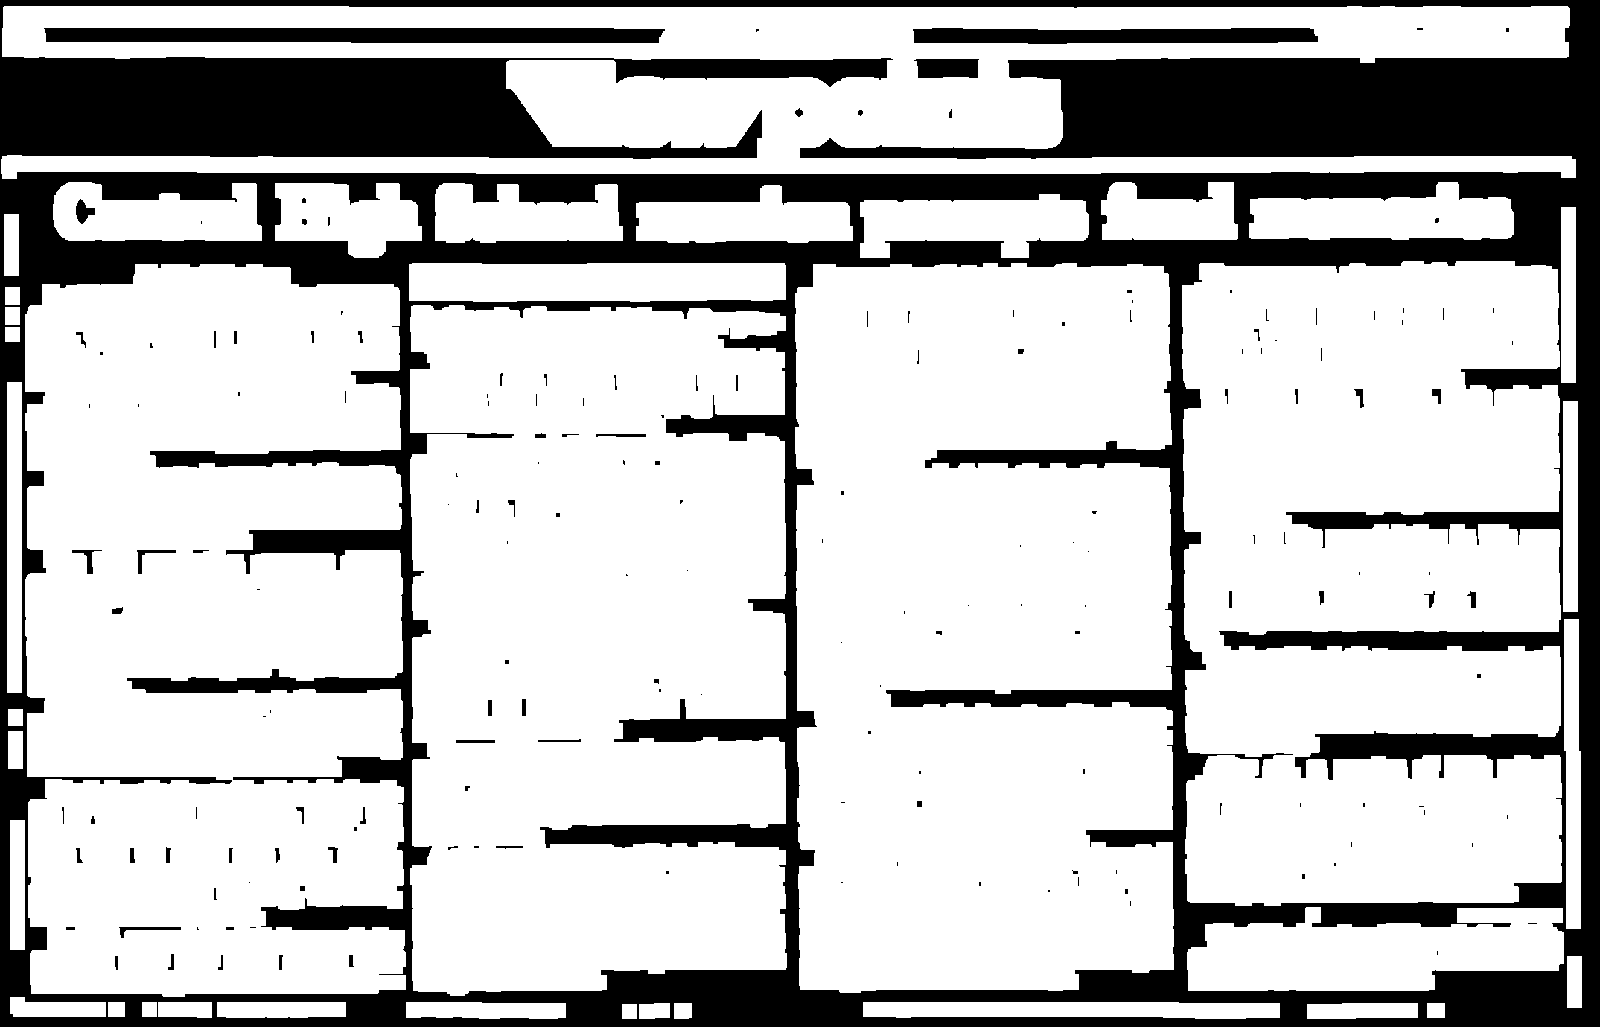

In [8]:
rect_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (15, 15)) 

# Appplying dilation on the threshold image 
dilation = cv2.dilate(thresh2, rect_kernel, iterations = 1) 
  
cv2_imshow(dilation)

### Using the dilated areas identify contours

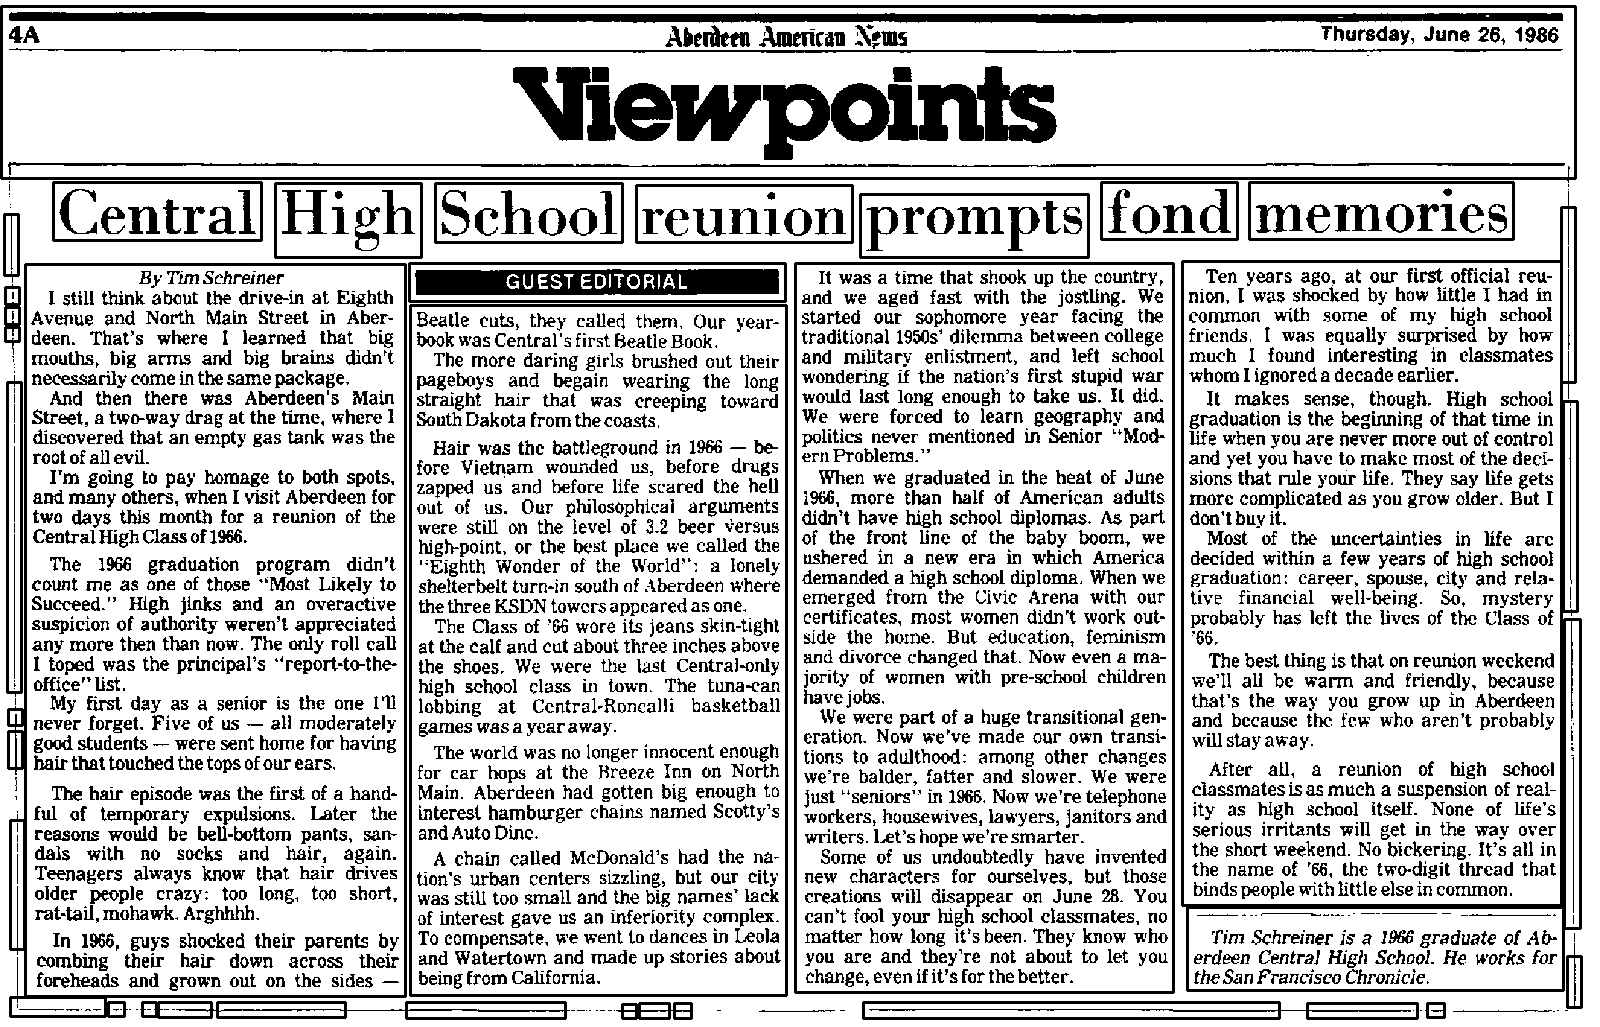

In [14]:
# Finding contours 
contours, hierarchy = cv2.findContours(dilation, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE) 

# Creating a copy of image 
im2 = img.copy() 


# Looping through the identified contours 
for cnt in contours: 
  cnt = cv2.boundingRect(cnt)
  box = bbox.BBox2D(cnt, bbox.XYWH)  
  x1, y1, x2, y2 = (int(box.x1), int(box.y1), int(box.x2), int(box.y2))    
  # Drawing a rectangle on copied image 
  rect = cv2.rectangle(im2, (x1, y1), (x2, y2), (0, 255, 0), 2) 

cv2_imshow(im2)

### Using identified contours to crop and extract text 

In [17]:
for cnt in contours: 
  cnt = cv2.boundingRect(cnt)
  box = bbox.BBox2D(cnt, bbox.XYWH)  
  x1, y1, x2, y2 = (int(box.x1), int(box.y1), int(box.x2), int(box.y2))    
  # Drawing a rectangle on copied image 
  rect = cv2.rectangle(im2, (x1, y1), (x2, y2), (0, 255, 0), 2) 
    
  # Cropping the text block for giving input to OCR 
  cropped = im2[y1:y2, x1:x2] 
    
  # Apply OCR on the cropped image 
  text = pytesseract.image_to_string(cropped)
  if text.strip() != '': 
    print(text.strip())

—
Tim Schreiner is a 1986 graduate of Ab-
erdeen Centra! High School. He works for
the San Francisco Chronicie.
Beatle cuts, they called them, Our year-
book was Central's first Beatle Book.

The more daring girls brushed out their
pageboys and begain wearing the long
straight hair that was creeping toward
South Dakota from the coasts,

Hair was the battleground in 1966 — be-
fore Vietnam wounded us, before drugs
zapped us and before life scared the hell
out of us. Our philosophical arguments
were still on the level of 3.2 beer versus
high-point, or the best place we called the
“Eighth Wonder of the World’: a lonely
shelterbelt turn-in south af Aberdeen where
the three KSDN tawors appeared as one.

The Class of *66 wore its jeans skin-tight
at the calf and cut about three inches above
the shoes, We were the last Central-only
high school class in town. The tuna-can
lobbing at Central-Roncalli basketball
games was a year away.

The world was no longer innocent enough
for car hops at the 